In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from musicautobot.imports import *
from musicautobot.numpy_encode import *
from musicautobot.vocab import *
from musicautobot.music_transformer.transform import *
from musicautobot.music_transformer.dataloader import *

In [3]:
from fastai.text.all import *


## MusicTransformer Training

MusicTransformer takes the basic idea of [Language Models](https://en.wikipedia.org/wiki/Language_model) and applies it to Music.  

Given a sequence of notes, predict the next most likely set of notes.

This model is based off of [transformer-XL](https://arxiv.org/abs/1901.02860) and uses fast.ai's [implementation](https://github.com/fastai/fastai/blob/master/fastai/text/models/transformer.py) of it.

In [4]:
# base_path = Path('../../data')

# # Location of your midi files
# midi_path = base_path/'midi/examples'
# midi_path.mkdir(parents=True, exist_ok=True)

# # Location to save dataset
# data_path = base_path/'numpy'
# data_path.mkdir(parents=True, exist_ok=True)

# data_save_name = 'musicitem_data_save.pkl'

In [6]:
base_path = Path('../../data/v20')
midi_path = base_path/'midi_sources/hooktheory'

data_path = base_path/'piano_duet/hooktheory'


## 1. Gather midi dataset

Make sure all your midi data is in `musicautobot/data/midi` directory

Here's a pretty good dataset with lots of midi data:  
https://www.reddit.com/r/datasets/comments/3akhxy/the_largest_midi_collection_on_the_internet/

Download the folder and unzip it to `data/midi`

## 2. Create dataset from MIDI files

In [7]:
vocab = MusicVocab.create()

In [5]:
# midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)
# tfms = [Midi2ItemTfm(vocab)]
# splits = RandomSplitter(seed=42)(range(len(midi_files)))
# dsets = Datasets(midi_files, [tfms], splits=splits)

31

In [8]:
np_files = get_files(data_path, '.npy', recurse=True); len(np_files)

39933

In [104]:

class MusicItemTfm(Transform):
    "`PreProcessor` that transforms numpy files to indexes for training"
    def __init__(self,vocab):
        self.vocab = vocab
        
    def encodes(self, f):
        npitem = np.load(f, allow_pickle=True) if isinstance(f, Path) else f
        miitem = MusicItem.from_npenc(npitem, vocab=self.vocab)
        return miitem

In [105]:
idxs = []
class Ls(list):
    def __getitem__(self, i):
        print('index:', i)
        idxs.append(i)
        return super().__getitem__(i)

In [107]:
subset = np_files[:200]

In [108]:
tfms = [MusicItemTfm(vocab), rand_transpose, mi2tensor]
splits = RandomSplitter(seed=42)(range(len(subset)))
dsets = Datasets(Ls(subset), [tfms], splits=splits)

index: 66
index: 176
index: 14
index: 106
index: 71
index: 193
index: 95
index: 16
index: 133
index: 113
index: 170
index: 112
index: 12
index: 149
index: 41
index: 79
index: 183
index: 141
index: 136
index: 68
index: 86
index: 124
index: 70
index: 36
index: 78
index: 196
index: 73
index: 90
index: 1
index: 2
index: 117
index: 140
index: 80
index: 19
index: 144
index: 109
index: 99
index: 13
index: 128
index: 83
index: 134
index: 110
index: 37
index: 185
index: 60
index: 130
index: 23
index: 165
index: 42
index: 35
index: 157
index: 182
index: 49
index: 44
index: 28
index: 145
index: 92
index: 120
index: 48
index: 184
index: 6
index: 33
index: 5
index: 135
index: 105
index: 191
index: 75
index: 29
index: 189
index: 34
index: 125
index: 20
index: 151
index: 188
index: 93
index: 38
index: 172
index: 116
index: 9
index: 91
index: 94
index: 146
index: 98
index: 11
index: 132
index: 179
index: 139
index: 102
index: 10
index: 39
index: 27
index: 15
index: 65
index: 119
index: 192
index: 96
i

In [68]:
coll = ReindexCollection(Ls([1,2,3]), cache=2)

In [69]:
coll[2]

index: 2


3

In [109]:
dls = DataLoaders.from_dsets(dsets, dl_type=LMDataLoader, bs=10, seq_len=128, cache=128).cuda()

index: 0
index: 1
index: 2
index: 3
index: 4
index: 5
index: 6
index: 7
index: 8
index: 9
index: 10
index: 11
index: 12
index: 13
index: 14
index: 15
index: 16
index: 17
index: 18
index: 19
index: 20
index: 21
index: 22
index: 23
index: 24
index: 25
index: 26
index: 27
index: 28
index: 29
index: 30
index: 31
index: 32
index: 33
index: 34
index: 35
index: 36
index: 37
index: 38
index: 39
index: 40
index: 41
index: 42
index: 43
index: 44
index: 45
index: 46
index: 47
index: 48
index: 49
index: 50
index: 51
index: 52
index: 53
index: 54
index: 55
index: 56
index: 57
index: 58
index: 59
index: 60
index: 61
index: 62
index: 63
index: 64
index: 65
index: 66
index: 67
index: 68
index: 69
index: 70
index: 71
index: 72
index: 73
index: 74
index: 75
index: 76
index: 77
index: 78
index: 79
index: 80
index: 81
index: 82
index: 83
index: 84
index: 85
index: 86
index: 87
index: 88
index: 89
index: 90
index: 91
index: 92
index: 93
index: 94
index: 95
index: 96
index: 97
index: 98
index: 99
index: 100

In [116]:
it = iter(dls.train)

In [112]:
idxs.clear()

In [117]:
for i in range(100):
    xb,yb = next(it)

index: 127
index: 161
index: 149
index: 17
index: 187
index: 167
index: 50
index: 81
index: 95
index: 147
index: 118
index: 137
index: 52
index: 8
index: 105
index: 41
index: 184
index: 102
index: 96
index: 157
index: 70
index: 126
index: 178
index: 99
index: 125
index: 93
index: 49
index: 159
index: 15
index: 67
index: 80
index: 181
index: 89
index: 28
index: 143
index: 192
index: 55
index: 72
index: 37
index: 20
index: 0
index: 150
index: 18
index: 9
index: 23
index: 197
index: 40
index: 120
index: 51
index: 103
index: 180
index: 78
index: 98
index: 38
index: 77
index: 131
index: 7
index: 114
index: 179
index: 90
index: 123
index: 175
index: 154
index: 87
index: 64
index: 35
index: 82
index: 177
index: 12
index: 135
index: 199
index: 36
index: 148
index: 69
index: 76
index: 43
index: 47
index: 130
index: 136
index: 97
index: 24
index: 155
index: 6
index: 65
index: 84
index: 48
index: 73
index: 45
index: 14
index: 16
index: 193
index: 110
index: 22
index: 185
index: 63
index: 57
index

StopIteration: 

In [118]:
len(idxs)

306

In [96]:
xb,yb = next(it)

index: 56


In [97]:
xb,yb = next(it)

index: 79
index: 53


In [98]:
xb,yb = next(it)

index: 61


In [99]:
xb,yb = next(it)

index: 76


In [100]:
xb,yb = next(it)

index: 15
index: 20


In [11]:

@delegates()
class MusicItemDataLoader(LMDataLoader):
    def __init__(self, dataset, trange=6, tp=0.5, encode_position=False, **kwargs):
        store_attr('trange,tp,encode_position')
        super().__init__(dataset, **kwargs)
        
    def make_chunks(self): 
        transpose_tfm = partial(rand_transpose, steps=self.trange, p=self.tp)
        tensor_tfm = mi2tensor if self.encode_position else lambda x: x.data
        pipeline = Pipeline([transpose_tfm, tensor_tfm])
        
        self.chunks = Chunks(list(map(pipeline, self.items)), self.lens)
        
    def create_item(self, seq):
        item = super().create_item(seq)
        return batch_position_tfm(item) if self.encode_position else item

In [12]:
dls = DataLoaders.from_dsets(dsets, dl_type=MusicItemDataLoader, bs=2, seq_len=24).cuda()

AxisError: axis 4 is out of bounds for array of dimension 1

## 3. Load Model

In [9]:
class DropOutput(Callback):
    def after_pred(self): self.learn.pred = self.pred[0]

In [10]:
import transformers

In [11]:
from transformers import TransfoXLLMHeadModel, TransfoXLConfig

In [12]:

def default_config():
    config = tfmerXL_lm_config.copy()
    config['act'] = Activation.GeLU

    config['mem_len'] = 512
    config['d_model'] = 512
    config['d_inner'] = 2048
    config['n_layers'] = 16

    config['n_heads'] = 8
    config['d_head'] = 64

    return config


In [13]:
len(vocab)

312

In [14]:
config = TransfoXLConfig(
    vocab_size=len(vocab), cutoffs=[],
    d_model=512, d_embed=512,
    n_head=8, d_head=64, 
    d_inner=2048, n_layer=16, 
    mem_len=512)

In [15]:
model = TransfoXLLMHeadModel(config)

In [16]:
xb, yb = dls.one_batch()

In [ ]:
out = model(xb)

In [18]:
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity())#.to_fp16()

In [19]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,perplexity,time


/home/ashaw/anaconda3/envs/musicautobot/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


IndexError: list index out of range

In [8]:
# batch_size = 1
# encode_position = True
# dl_tfms = [batch_position_tfm] if encode_position else []
# data = load_data(data_path, data_save_name, bs=batch_size, encode_position=encode_position, dl_tfms=dl_tfms)

In [9]:
config = default_config()
config['encode_position'] = encode_position
learn = music_model_learner(data, config=config.copy())

## 4. Train

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.398574,3.373378,0.174725,00:22
1,3.173110,3.283443,0.148352,00:20
2,3.235486,3.205513,0.174725,00:20
3,3.154775,3.102941,0.252747,00:20


In [11]:
learn.save('example')

PosixPath('../../data/numpy/models/example.pth')

## 5. Predict

---
See [Generate.ipynb](Generate.ipynb) to use a pretrained model and generate better predictions

---

In [13]:
midi_file = base_path/'midi/notebook_examples/single_bar_example.mid'; midi_file
item = MusicItem.from_file(midi_file, data.vocab);

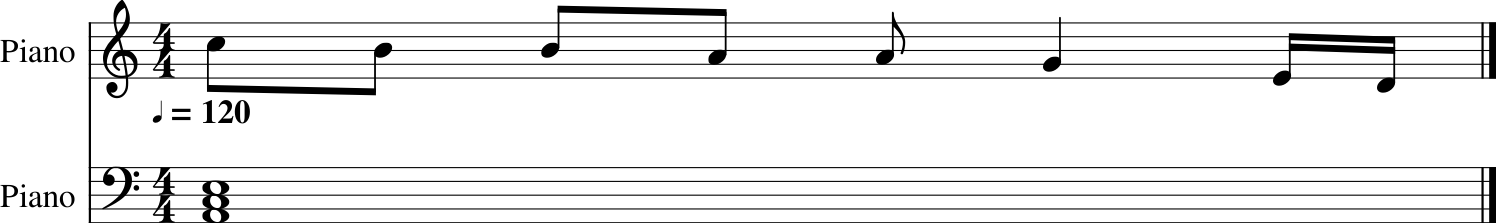

In [14]:
item.show()

Here's what the seed sounds like:

### Start Predictions:

In [ ]:
pred, full = learn.predict(item, n_words=100)

Prediction

In [ ]:
# Prediction
pred.show()

In [ ]:
pred.play()